In [15]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [16]:
class Particle:
    
    def __init__(self, r0, v0, a0, t, m=1, radius=2., Id=0):
        
        self.dt = t[1] - t[0]
        
        
        # Atributos instantaneos
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
        
        self.p = self.m*self.v
        
        #momento angular
        self.l = np.cross(self.r,self.p)
        
        self.f = self.m*self.a
        
        # Historial
        
        self.R = np.zeros((len(t),len(r0)))
        self.V = np.zeros_like(self.R)
        self.A = np.zeros_like(self.R)
        
        self.F = np.zeros_like(self.R)
        
        self.P = np.zeros_like(self.R)
        #momento angular
        self.L = np.zeros(len(t))
        
        
        # Fisica
        self.sigma = 1.5*self.radius
        
        self.epsilon = 1500
        
        self.VEk = np.zeros(len(t))
        self.Ep = 0.
        self.VEp = np.zeros(len(t))
        
    def Evolution(self,i):
        
        
        self.SetPosition(i)
        self.SetVelocity(i)
        
        self.a = self.f/self.m
        
        # Euler
       # self.r += self.dt*self.v
       # self.v += self.dt*self.a
        
        self.SetPotentialEnergy(i)
        
        # Euler-Cromer
        self.v += self.dt*self.a
        self.r += self.dt*self.v
        
        
    def CalculateForce(self,p):
        
        d = np.linalg.norm(self.r - p.r)
        
        Fn = 4*self.epsilon*( 12*self.sigma**12/d**13 - 6*self.sigma**6/d**7  )
        
        self.n = (self.r - p.r)/d     
        
        self.f = np.add(self.f,Fn*self.n)
        
        # Falta implementar energía potencial 
        self.Ep += 4*self.epsilon*( self.sigma**12/d**12 - self.sigma**6/d**6  )
        
    # Aca debes agregar la energía potencial
    def ResetForce(self):
        self.f[:] = 0.
        self.a[:] = 0.
        self.Ep = 0.
    
    # Setter
    def SetPosition(self,i):
        self.R[i] = self.r
    
    def SetVelocity(self,i):
        self.V[i] = self.v
        self.P[i] = self.m*self.v
        if len(self.v)<=2:
            self.L[i] = np.cross(self.r,self.p)
        else:
            self.L[i] = 0
        self.VEk[i] = 0.5*self.m*np.dot(self.v,self.v)
    
    def SetPotentialEnergy(self,i):
        self.VEp[i] = self.Ep
    
    # Getter
    def GetPosition(self,scale=1):
        return self.R[::scale]
    
    def GetVelocity(self,scale=1):
        return self.V[::scale]
 
    def GetMomentum(self,scale=1):
        return self.P[::scale]
    
    def GetKineticEnergy(self,scale=1):
        return self.VEk[::scale] 
    
    def GetPotentialEnergy(self,scale=1):
        return self.VEp[::scale]
    #momento angular
    
    def GetAngularMomentum(self, scale=1):
        return self.L[::scale]
    
    #walls
        '''
        if compresion_wall1 >= 0:
            
            Fn = self.K * compresion_wall1**3
            
            self.n = (self.r - 20)/dwall1   
            self.f = np.add(self.f,Fn*self.n)
         #paredes
        if compresion_wall2>=0:
            Fn = self.K * compresion_wall2**3
            
            self.n = (self.r - (-20))/dwall2     
            self.f = np.add(self.f,Fn*self.n)   
        '''
    '''
    def CalculateWallForce(self, wall_limits):
        #Calcula la fuerza ejercida por las paredes en la partícula.
        xmin, xmax, ymin, ymax = wall_limits
        #pared izquierda
        if self.r[0] - self.radius < xmin:
            self.f[0] += self.K * (self.radius - (self.r[0] - xmin)) ** 3
        #pared derecha
        elif self.r[0] + self.radius > xmax:
            self.f[0] -= self.K * (self.radius - (xmax - self.r[0])) ** 3
        #pared abajo
        if self.r[1] - self.radius < ymin:
            self.f[1] += self.K * (self.radius - (self.r[1] - ymin)) ** 3
        #pared arriba
        elif self.r[1] + self.radius > ymax:
            self.f[1] -= self.K * (self.radius - (ymax - self.r[1])) ** 3
        
    '''
    # Aca debes agregar la energía potencial

In [17]:
def GetParticles(N,t):
    limites_mesa=[-20,20]
    limites_vel=[-5,5]
    a0 = np.array([0.,0.])
    '''
    r0 = np.array([-5.,0.])
    v0 = np.array([10.,0])
  
    
    r1 = np.array([0.,0.])
    v1 = np.array([0.,0.])
    a1 = np.array([0.,0.])
    
    r2 = np.array([4.,0.])
    v2 = np.array([0.,0.])
    a2 = np.array([0.,0.])
    '''
    #aletoriedad de velocidades y posicion en la mesa con los limites en cuenta
    
    Particles=np.array([])
    for i in range(N):
        v_=np.array([np.random.uniform(limites_vel[0],limites_vel[1]),np.random.uniform(limites_vel[0],limites_vel[1])])
        r_=np.array([np.random.uniform(limites_mesa[0],limites_mesa[1]),np.random.uniform(limites_mesa[0],limites_mesa[1])])
        p_=[Particle(r_,v_,a0,t,m=1,radius=2,Id=i)]
        Particles=np.concatenate((Particles,p_))
                                       
    # Aca deber agregar una rutina montecarlo para crear particulas
    # sobre el plano con velocidades aleatorias.
    
    return Particles

In [18]:
dt =  0.001
tmax = 10
t = np.arange(0,tmax,dt)
Particles = GetParticles(10,t)

In [19]:
def RunSimulation(t,Particles):
    wall_limits=[-20,20,-20,20]
    for it in tqdm(range(len(t)), desc='Running simulation', unit=' Steps' ):
        
        for i in range(len(Particles)):
            for j in range(len(Particles)):
               
                #Particles[i].CalculateWallForce(wall_limits)
                #Particles[j].CalculateWallForce(wall_limits)
                if i!=j:
                    Particles[i].CalculateForce(Particles[j])
        
        for i in range(len(Particles)):
            Particles[i].Evolution(it)
            Particles[i].ResetForce()
            # Aca debes agregar la interaccion con la pared
            
            
    return Particles

In [20]:
Particles = RunSimulation(t,Particles)

Running simulation: 100%|███████████████████████████████████████████████████| 10000/10000 [00:48<00:00, 204.30 Steps/s]


In [21]:
# Bajamos dimensión de la simulacion
scale = 200
t1 = t[::scale]

<IPython.core.display.Javascript object>


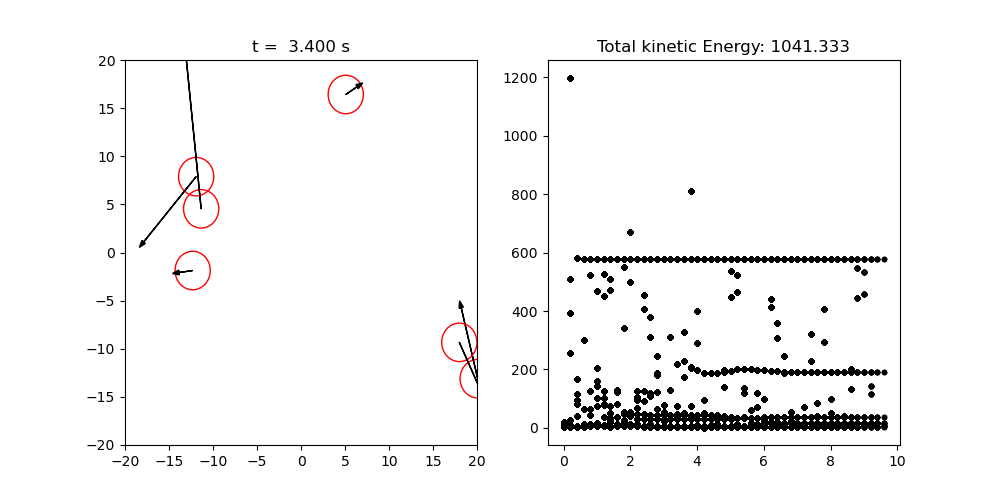

In [22]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t1[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0. # Kinetic energy
    
    for p in Particles:
        
        x = p.GetPosition(scale)[i,0]
        y = p.GetPosition(scale)[i,1]
        
        vx = p.GetVelocity(scale)[i,0]
        vy = p.GetVelocity(scale)[i,1]
        
        circle = plt.Circle( (x,y), p.radius, color='r', fill=False )
        ax.add_patch(circle)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.GetKineticEnergy(scale)[i]
        
        ax1.set_title(r'Total kinetic Energy: {:.3f}'.format(KE))
        ax1.scatter(t1[:i], p.GetKineticEnergy(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

In [23]:
MomentumT = Particles[0].GetMomentum(scale)
MomentumL = Particles[0].GetAngularMomentum(scale)

EnergyT = Particles[0].GetKineticEnergy(scale)

EnergyP = Particles[0].GetPotentialEnergy(scale)

EnergyP *= 0.5

In [24]:
for i in range(1,len(Particles)):
    MomentumT = np.add(MomentumT,Particles[i].GetMomentum(scale))
    MomentumL = np.add(MomentumL,Particles[i].GetAngularMomentum(scale))
    EnergyT = np.add(EnergyT,Particles[i].GetKineticEnergy(scale))
    EnergyP = np.add(EnergyP,Particles[i].GetPotentialEnergy(scale))

<IPython.core.display.Javascript object>


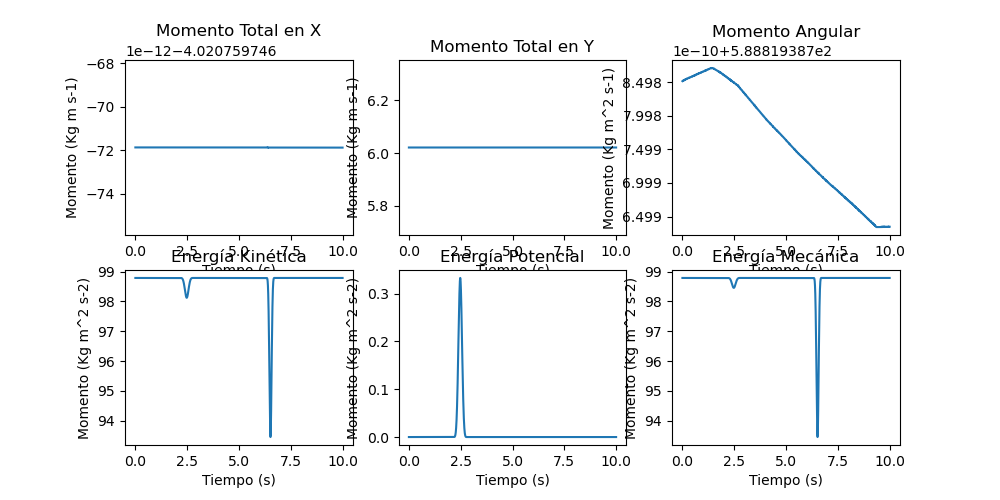

Text(0, 0.5, 'Momento (Kg m^2 s-2)')

In [25]:
fig,ax2 = plt.subplots(2,3,figsize = (10,5))

ax2[0][0].plot(t,x_momento)
ax2[0][0].set_title("Momento Total en X")
ax2[0][0].set_xlabel("Tiempo (s)")
ax2[0][0].set_ylabel("Momento (Kg m s-1)")

ax2[0][1].plot(t,y_momento)
ax2[0][1].set_title("Momento Total en Y")
ax2[0][1].set_xlabel("Tiempo (s)")
ax2[0][1].set_ylabel("Momento (Kg m s-1)")

ax2[0][2].plot(t,a_momento)
ax2[0][2].set_title("Momento Angular")
ax2[0][2].set_xlabel("Tiempo (s)")
ax2[0][2].set_ylabel("Momento (Kg m^2 s-1)")

ax2[1][0].plot(t,k_total)
ax2[1][0].set_title("Energía Kinética")
ax2[1][0].set_xlabel("Tiempo (s)")
ax2[1][0].set_ylabel("Momento (Kg m^2 s-2)")

ax2[1][1].plot(t,EP_total)
ax2[1][1].set_title("Energía Potencial")
ax2[1][1].set_xlabel("Tiempo (s)")
ax2[1][1].set_ylabel("Momento (Kg m^2 s-2)")

ax2[1][2].plot(t,k_total+EP_total)
ax2[1][2].set_title("Energía Mecánica")
ax2[1][2].set_xlabel("Tiempo (s)")
ax2[1][2].set_ylabel("Momento (Kg m^2 s-2)")

### a),b)

Al analizar la física del sistema esto nos dice que el momento en $x$ y $y$ se debe conservar esto debido a que, las partículas al chocar no pierden velocidad.


### d) 
Como no se pierde velocidad en el choque la energía cinetina se debe conservar.

### e)
Si el potencial es positivo, indica que la fuerza actuante era repulsiva. Por lo tanto, a medida que la compresión y la fuerza en dirección opuesta al choque aumenten, la energía potencial también lo hará correspondientemente.

### f)
Aunque en el modelo que asumimos la energía mecánica debe conservarse, el método de Euler no es preciso y provoca que las pelotas "se calienten" durante los choques. Esto resulta en que la energía potencial no compense la pérdida de energía cinética al disminuir la velocidad durante el choque.

### g)
En este sistema se cumple la conservación de la energía cinética, ya que $\Delta K=0$. Esto se alinea con el trabajo realizado por la fuerza de repulsión, que realiza un trabajo negativo desde el primer contacto entre las pelotas hasta que alcanzan una velocidad de 0. El trabajo total en un choque es 0, como indica el teorema de trabajo y energía.

### h)
El momento angular solo se conserva en ausencia de fuerzas externas actuando sobre el objeto. Cuando dos pelotas chocan, se genera una fuerza haciendo asi que el momento angular no se conserva. Sin embargo, en ausencia de choques, el momento angular se mantiene constante.

### i)
Partiendo de que solo se consideran velocidades en las direcciones $x$ y $y$, y todas las pelotas tienen posición en $z=0$, los choques ocurren en el mismo plano y no provocan desplazamiento en $z$. Pero obviamente con velocidad o posición en $z$, las pelotas podrían moverse en todo el volumen describiendo asi movimientos en 3D, lo cual es lógico a la hora de analizar moviemientos en el espacio.
